191.19359487561843


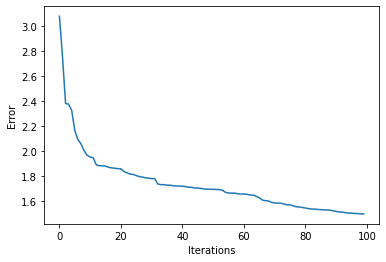

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
dataframe=pd.read_csv('D:\PRML Assignment 2\PRML Assignment 2\A2Q2Data_train.csv',header=None)
arr=dataframe.to_numpy()
y=arr[:,100]
x_trans=arr[:,0:100]
x=x_trans.transpose()
a=np.dot(x,x_trans)
a=np.linalg.inv(a)
w=np.dot(a,x)
w=np.dot(w,y)
n=0.0000039
dataframe_test=pd.read_csv('D:\PRML Assignment 2\PRML Assignment 2\A2Q2Data_test.csv',header=None)
arr_test=dataframe_test.to_numpy()
x_test=arr_test[:,0:100]
x_test=x_test.transpose()
y_pred=np.dot(w.transpose(),x_test)
y_test=arr_test[:,100]
def calc_error_y(x,w,y):
    y_pred=np.dot(w.transpose(),x)
    return round(np.sum(np.power(y-y_pred,2)),2)
d_s=[]
w_array=[]
w_s0=np.random.random(100)
w_curr=w_s0
for i in range(0,100):
    index=np.random.randint(10000,size=100)
    arr_temp=arr[index,:]
    x_temp_trans=arr_temp[:,0:100]
    x_temp=x_temp_trans.transpose()
    y_temp=arr_temp[:,100]
    xxt_temp=np.dot(x_temp,x_temp_trans)
    error1=0
    diff=999
    while(diff>0.00001):
        grad=2*np.dot(xxt_temp,w_curr)-2*np.dot(x_temp,y_temp)
        w_prev=w_curr;
        w_curr=w_prev-n*(grad)
        m=np.linalg.norm(w-w_curr)
        error2=error1
        error1=calc_error_y(x_temp,w_prev,y_temp) 
        diff=abs(error1-error2)
    d_s.append(m)
    w_array.append(w_curr)
w_array=np.array(w_array)
w_sgd=w_array.sum(axis=0)/100
y_p_sgd=np.dot(w_sgd.transpose(),x_test)
print(np.sum(np.power(y_test-y_p_sgd,2)))
# print(m)
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.plot(d_s)
plt.show()